In [1]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import aligater as ag

In [4]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/31-03-2016/plate 1", lFilter=["T cells_C9_C09"])

Collected 1 files, 59 files did not pass filter(s) and mask(s).


In [5]:
fcs = ag.loadFCS(fcsList[0], return_type="AGsample")

Opening file T cells_C9_C09_047 from folder /31-03-2016/plate 1
Loaded dataset with 500000 events.
Marker labels: CD39 CD127 CD45RO CD25 CD45RA CD3 CD194 CD4 


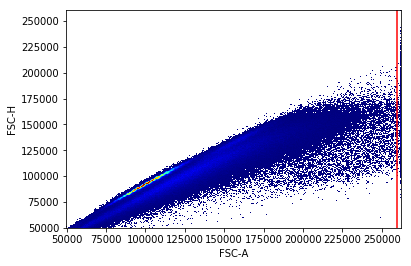

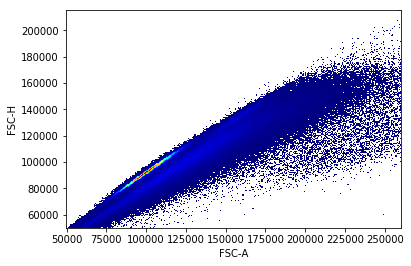

After gating, 494833 out of 500000 events remain.


In [6]:
no_clutter=ag.gateThreshold(fcs(),"FSC-A", "FSC-H",thresh=260000, orientation='vertical',population="lower")

After gating, 485568 out of 494833 events remain.


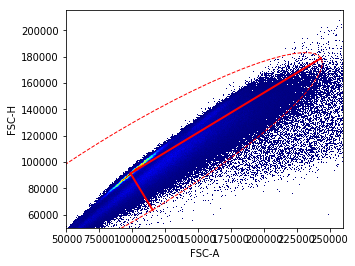

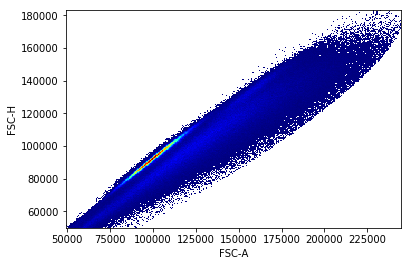

In [7]:
singlets=ag.gatePC(fcs(),"FSC-A", "FSC-H",center='density',widthScale=4, heightScale=4, vI=no_clutter, plot=True)

In [8]:
fcs.update(ag.AGgate(singlets, fcs.full_index()),"singlets","total")

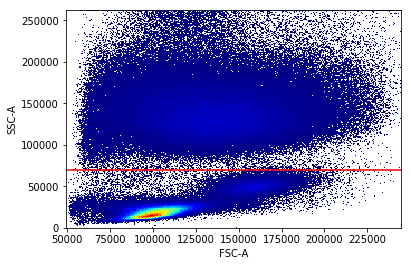

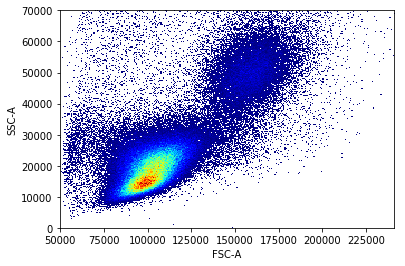

After gating, 201266 out of 485568 events remain.


In [9]:
PBMCstep1=ag.gateThreshold(fcs(),xCol="FSC-A",yCol="SSC-A",vI=singlets, orientation="horisontal",thresh=70000,population="lower")

After gating, 186276 out of 201266 events remain.


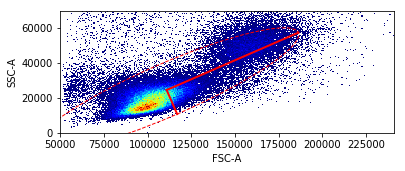

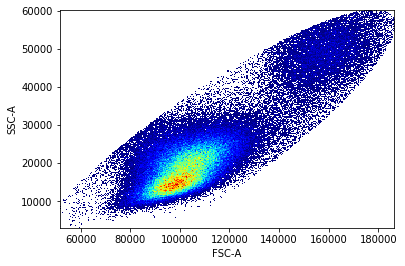

In [10]:
PBMC=ag.gatePC(fcs(),"FSC-A","SSC-A",center='centroid',widthScale=3, heightScale=2, vI=PBMCstep1, plot=True)

In [11]:
fcs.update(ag.AGgate(PBMC, singlets),"PBMC","singlets")

(<matplotlib.figure.Figure at 0x7fd584d80f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd584cf1748>)

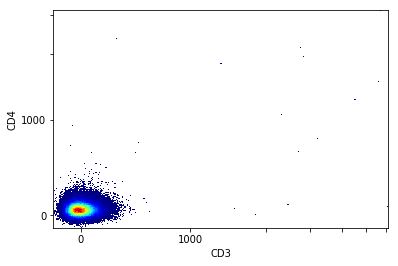

In [49]:
ag.plotHeatmap(fcs(),"CD3","CD4",PBMC, scale='logish')

In [13]:
ylim=ag.valleySeek(fcs(),"CD4",vI=PBMC,interval=[0,1000],scale='logish')
ylim

876.06641390700713

Input quadgate solution score: 1.99912322229e-05
Tested 20 solution(s) excluding the input solution
Best solution had score: 1.08876538773e-05


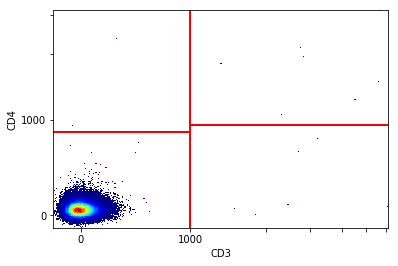

In [14]:
tmp1, CD4pos, CD4neg, tmp2, solution=ag.variableQuadGate(fcs(),"CD3","CD4",vI=PBMC,scale='logish',threshList=[1000,1000,ylim,ylim],testRange=[0,1000],position='right',scoreThresh=0.9)

(<matplotlib.figure.Figure at 0x7fd583fdaef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd583f70710>)

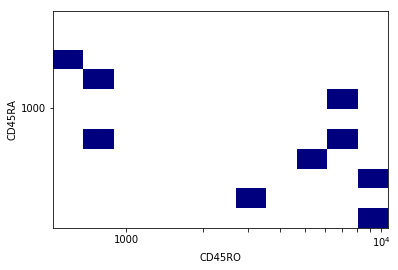

In [15]:
ag.plotHeatmap(fcs(), "CD45RO", "CD45RA",CD4pos, scale='logish')

In [16]:
def CD4gate(vI):
    xlim=ag.valleySeek(fcs(),"CD45RO",vI,interval=[500,2000],scale='logish')
    ylim=ag.valleySeek(fcs(), "CD45RA",vI,interval=[500,2000],scale='logish')
    solution=ag.variableQuadGate(fcs(),"CD45RO","CD45RA",vI=vI,scale='logish',threshList=[xlim,xlim,ylim,ylim],testRange=[500,1500],position='left',only_solution=True,plot=False)
    naiveCD4, tmp1, memoryCD4, tmp2, solution=ag.variableQuadGate(fcs(),"CD45RO","CD45RA",vI=vI,scale='logish',threshList=solution,testRange=[500,1500],position='right',only_solution=False,plot=False)
    return naiveCD4, memoryCD4

Figure something out

In [17]:
naiveCD4pos,memoryCD4pos = CD4gate(CD4pos)

Input quadgate solution score: 0.0
Tested 20 solution(s) excluding the input solution
Best solution had score: 0.0
Input quadgate solution score: 0.0
Tested 20 solution(s) excluding the input solution
Best solution had score: 0.0
1 quadrant(s) contain no events


In [18]:
naiveCD4neg,memoryCD4neg = CD4gate(CD4neg)

Input quadgate solution score: 0.0
Tested 20 solution(s) excluding the input solution
Best solution had score: 0.0
Input quadgate solution score: 0.0
Tested 20 solution(s) excluding the input solution
Best solution had score: 0.0


In [19]:
def FMOCD39(vI):
    output=ag.gateThreshold(fcs(), "CD39","FSC-H",vI=vI,orientation='vertical', scale='logish',thresh=600,population='upper',plot=False)
    return output

In [20]:
CD39posMemoryCD4pos = FMOCD39(memoryCD4pos)
CD39posMemoryCD4neg = FMOCD39(memoryCD4neg)
CD39posNaiveCD4pos = FMOCD39(naiveCD4pos)
CD39posNaiveCD4neg = FMOCD39(naiveCD4neg)

After gating, 0 out of 4 events remain.
After gating, 0 out of 3 events remain.
After gating, 0 out of 2 events remain.
After gating, 0 out of 6 events remain.


Back to CD4pos again

(<matplotlib.figure.Figure at 0x7fd58407d630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd584049b38>)

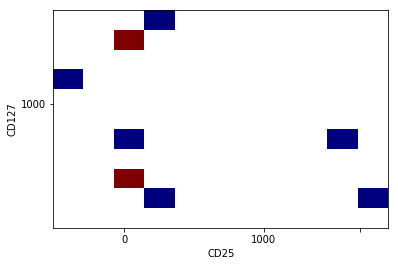

In [21]:
ag.plotHeatmap(fcs(),"CD25","CD127",CD4pos,scale='logish')

Fewer events than bins, readjusting number of bins


(<matplotlib.figure.Figure at 0x7fd5840a9240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd58407d7f0>)

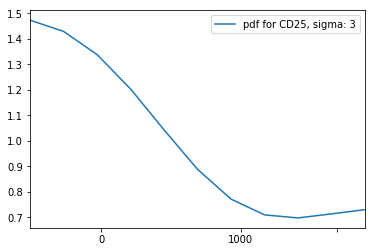

In [22]:
ag.plot_densityFunc(fcs(),"CD25",CD4pos, scale='logish')

In [23]:
mean, sigma, maxVal = ag.axisStats(fcs(),"CD25",CD4pos)

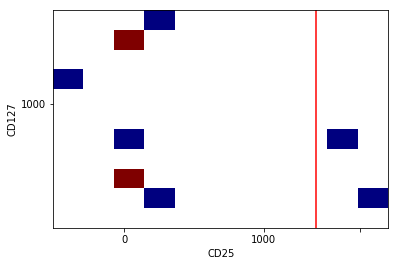

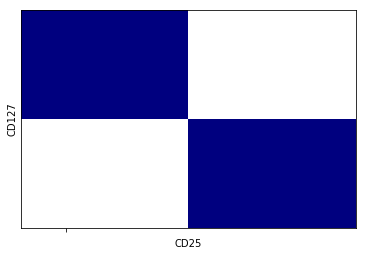

After gating, 2 out of 11 events remain.


In [24]:
CD25step1=ag.gateThreshold(fcs(),"CD25","CD127",vI=CD4pos,orientation='vertical',thresh=mean+sigma,scale='logish')

Rework to half-gaussian estimation

Fewer events than bins, readjusting number of bins


(<matplotlib.figure.Figure at 0x7fd583ff5438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd583f90630>)

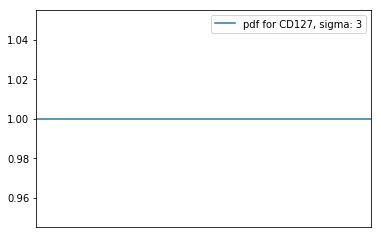

In [25]:
ag.plot_densityFunc(fcs(),"CD127",CD25step1,scale='logish')

In [26]:
ylim=ag.valleySeek(fcs(),"CD127",vI=CD25step1,interval=[500,1000],scale='logish')

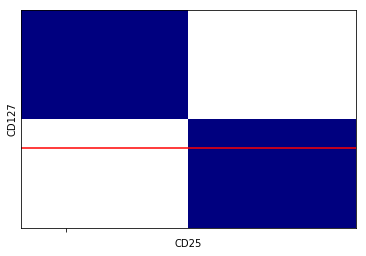

Passed index contains no events


After gating, 1 out of 2 events remain.


In [27]:
Tregs=ag.gateThreshold(fcs(),"CD25","CD127",vI=CD25step1,orientation='horisontal',population='lower',thresh=ylim,scale='logish')

In [28]:
ag.plotHeatmap(fcs(),"CD25","CD45RA",Tregs,scale='logish',aspect='equal')

Passed index contains no events


In [29]:
mean,sigma,maxval=ag.axisStats(fcs(),"CD45RA",Tregs)

In [30]:
sigma

0.0

In [31]:
mean

381.41867596136552

In [32]:
maxval

381.42034262803219

In [33]:
activatedTreg = ag.gateThreshold(fcs(),"CD25","CD45RA",vI=Tregs, thresh = maxval+0.5*sigma, population='upper',scale='logish',plot=False)

After gating, 1 out of 1 events remain.


In [34]:
bottomTreg = ag.gateThreshold(fcs(),"CD25","CD45RA",vI=Tregs, thresh = maxval+0.5*sigma, population='lower',scale='logish',plot=False)

After gating, 0 out of 1 events remain.


In [35]:
mean, sigma, maxval=ag.axisStats(fcs(),"CD25",bottomTreg)

Passed index contains no events

In [36]:
mean

0

In [37]:
sigma

0

In [38]:
secretingTreg=ag.gateThreshold(fcs(),"CD25","CD45RA",thresh=mean+sigma ,vI=bottomTreg,scale='logish',population='upper',orientation='vertical')

Passed index contains no events


In [39]:
restingTreg=ag.gateThreshold(fcs(),"CD25","CD45RA",thresh=mean+sigma ,vI=bottomTreg,scale='logish',population='lower',orientation='vertical')

Passed index contains no events


In [40]:
CD39secretingTreg = FMOCD39(secretingTreg)
CD39activatedTreg = FMOCD39(activatedTreg)
CD39restingTreg = FMOCD39(restingTreg)

Passed index contains no events
After gating, 0 out of 1 events remain.
Passed index contains no events


Another branch from Tregs

In [41]:
ag.plotHeatmap(fcs(),"CD194","CD45RO",Tregs, scale='logish')

Passed index contains no events


In [42]:
mean, sigma, maxval=ag.axisStats(fcs(),"CD45RO",Tregs)
[mean, sigma, maxval]

[3190.7904842785447, 0.0, 3190.7921509452117]

Fewer events than bins, readjusting number of bins
/home/ludvig/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3190.79048428, right=3190.79048428
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x7fd5840d8470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd5840bd710>)

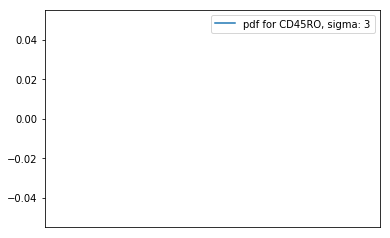

In [43]:
ag.plot_densityFunc(fcs(),"CD45RO",vI=Tregs,scale='logish')

In [44]:
maxval

3190.7921509452117

In [45]:
mean, sigma = ag.halfNormalDistribution(fcs(),"CD45RO",mean=maxval,direction='up',vI=Tregs,scale='logish')

In [46]:
mean

1.5038985150560831

In [47]:
ylim=ag.inverseLogishTransform([mean-sigma],1000)[0]

Really unsure how well this works atm

In [50]:
CD45ROposTregs=ag.gateThreshold(fcs(),"CD194","CD45RO",vI=Tregs,thresh=ylim,orientation='horisontal',scale='logish',population='upper',plot=False)

After gating, 0 out of 1 events remain.
